# Data cleaning and Data preprocessing

In [7]:
# Import needed libraries for data manipulation and analysis
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore') 
%matplotlib inline # Makes plots appear inline in a notebook 



In [71]:
# Load the dataset file
file_path = 'bank-additional.csv'  # This is the relative path to the dataset file

# Load the dataset (uses ';' as separator because the file is semicolon-delimited
data = pd.read_csv(file_path, delimiter=';')  


In [73]:
# Show the first few rows of the dataset to preview the structure
print("Initial Data Preview:")
display(data.head())  


Initial Data Preview:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [81]:
# Step 1: Checking missing values and 'unknown' entries in each column
print("Analyzing Missing and 'Unknown' Values...")
missing_data_summary = {
    "Column Name": data.columns,  # Show all column names
    "Number of Missing Values": data.isnull().sum(),  # Number of missing values in each column
    "Number of Unknown Values": data.apply(lambda col: col[col == 'unknown'].count() if col.dtype == 'object' else 0)  # For each column: count how many values are 'unknown'
}
# Create a DataFrame for missing data summary
missing_data_df = pd.DataFrame(missing_data_summary)  

# Show the summary
display(missing_data_df) 


Analyzing Missing and 'Unknown' Values...


,Column Name,Number of Missing Values,Number of Unknown Values
age,age,0,0
job,job,0,39
marital,marital,0,11
education,education,0,167
default,default,0,803
housing,housing,0,105
loan,loan,0,105
contact,contact,0,0
month,month,0,0
day_of_week,day_of_week,0,0


Visualizing Categorical Columns...


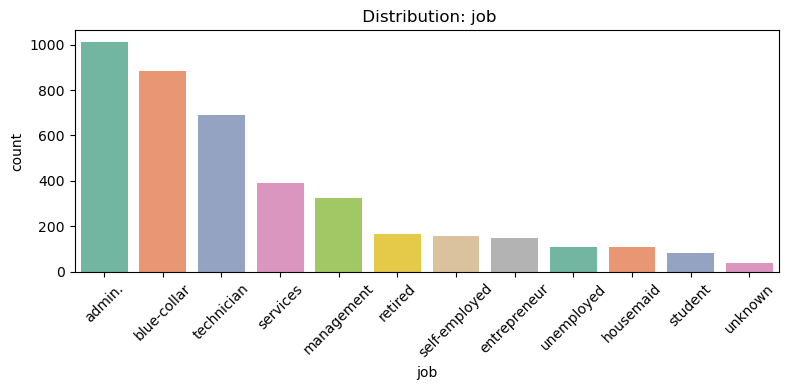

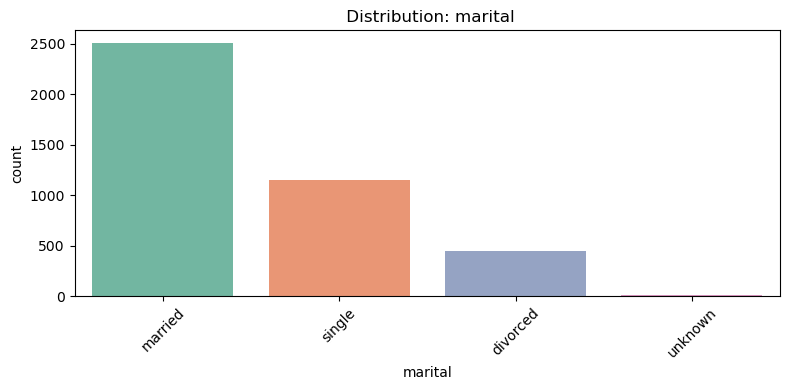

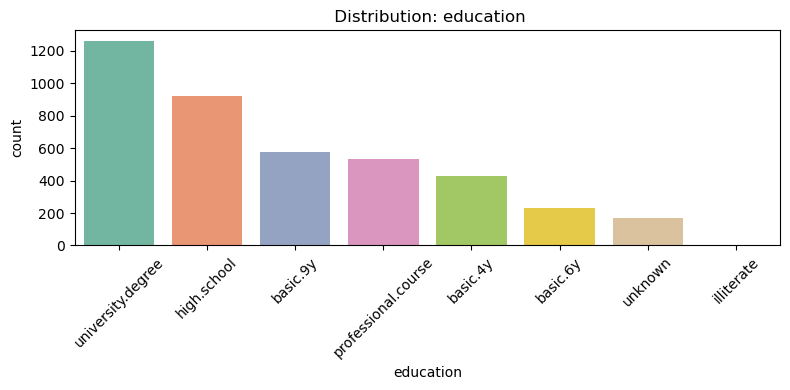

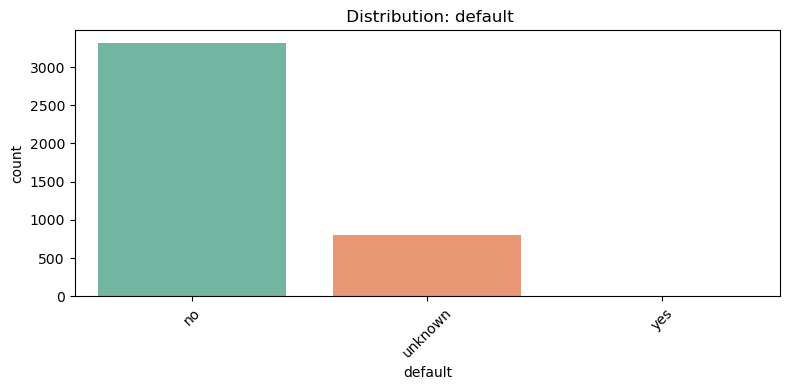

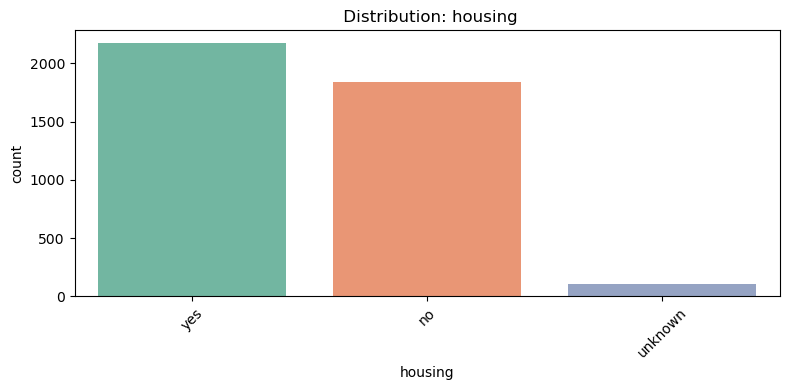

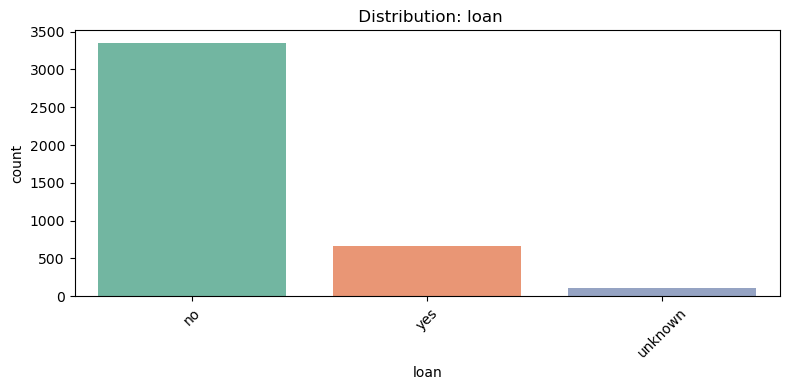

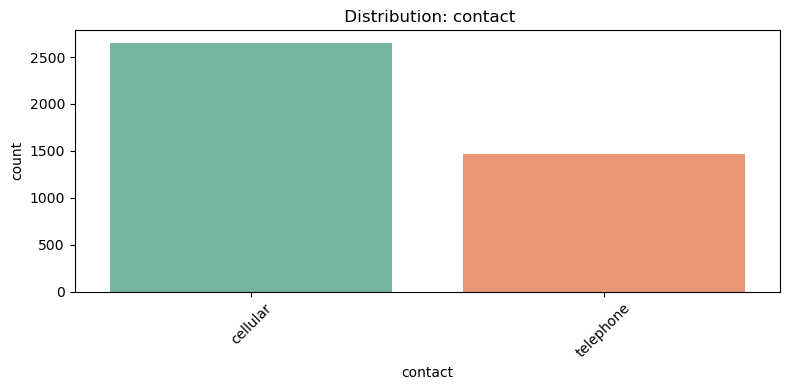

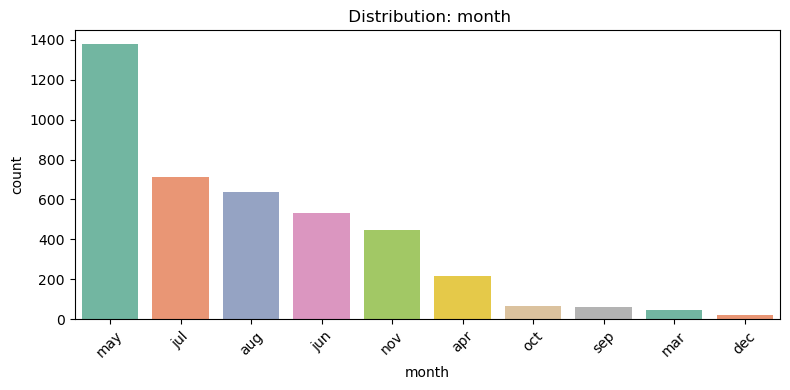

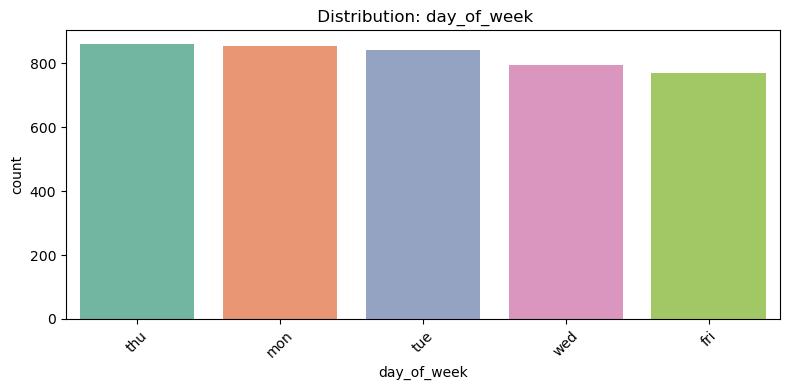

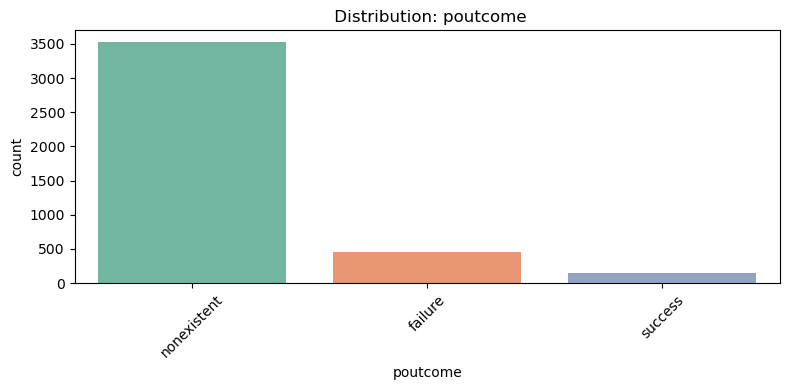

In [95]:
# Step 2: Visualize distributions of categorical features
print("Visualizing Categorical Columns...")

# Select all categorical columns, excluding the last column (the target variable)
categorical_cols = data.select_dtypes(include=['object']).columns[:-1] 

# Iterate through each categorical column and plot its distribution
for col in categorical_cols:
    plt.figure(figsize=(8, 4))  # Define the size of the plot (width=8, height=4)

    # Create a count plot showing the frequency of each category, sorted by count
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="Set2")  # Plot count of categories
    plt.title(f" Distribution: {col}")  # Set title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Prevent overlapping content
    plt.show()  # Display the plot


Creating Distribution Plots for Numerical Features...


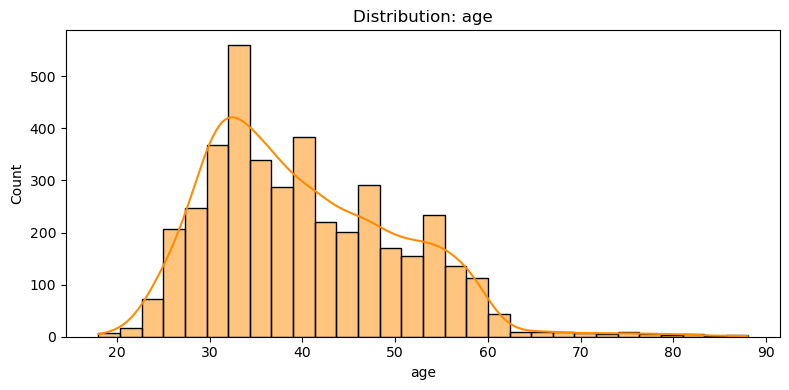

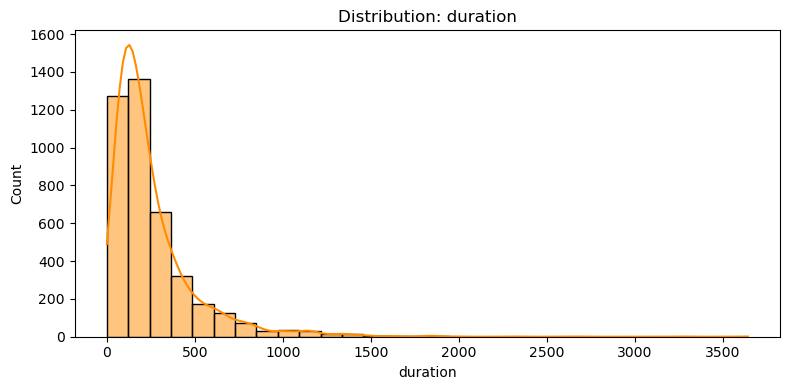

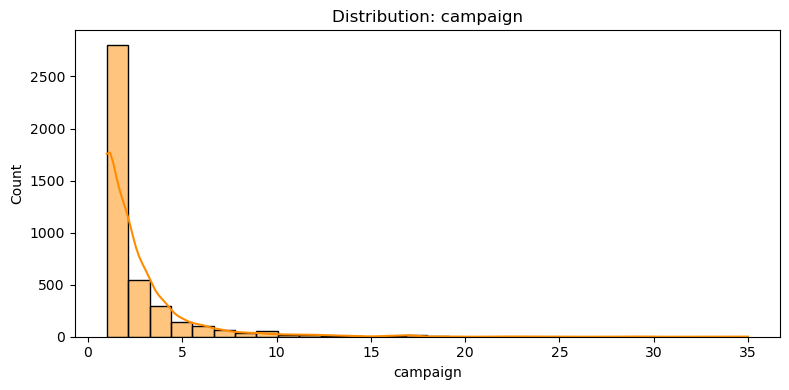

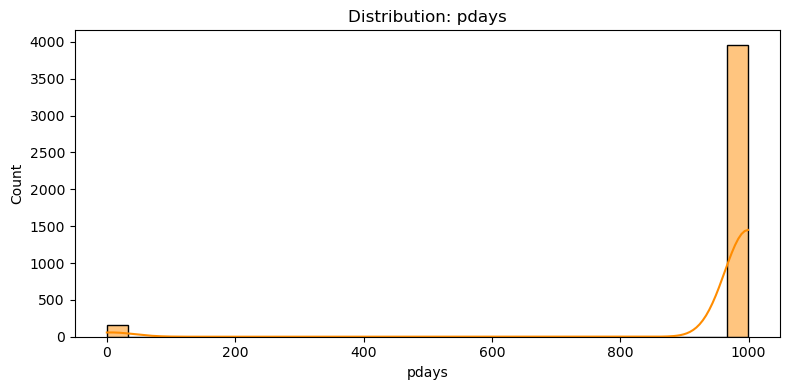

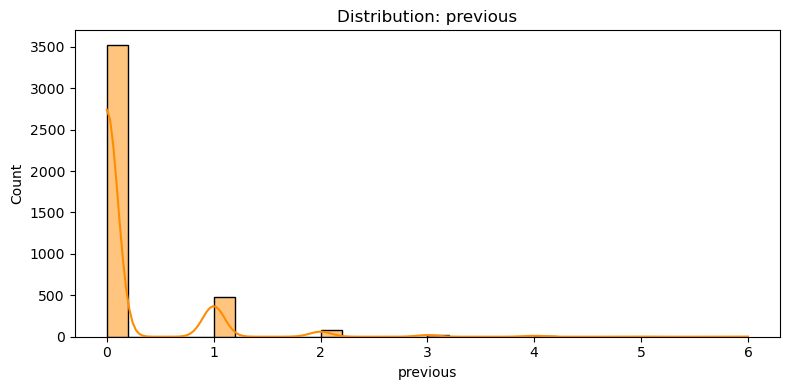

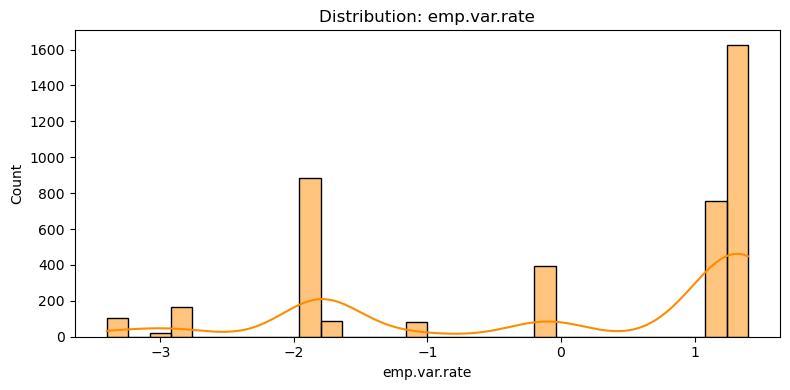

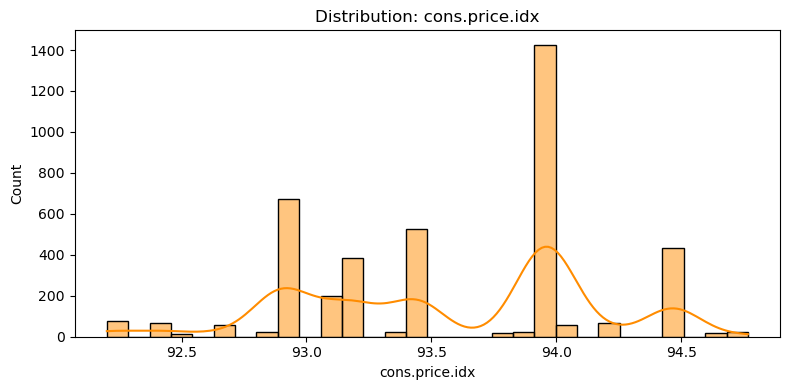

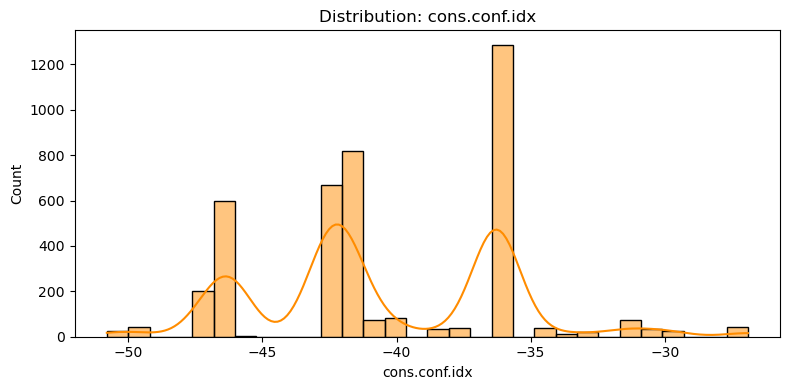

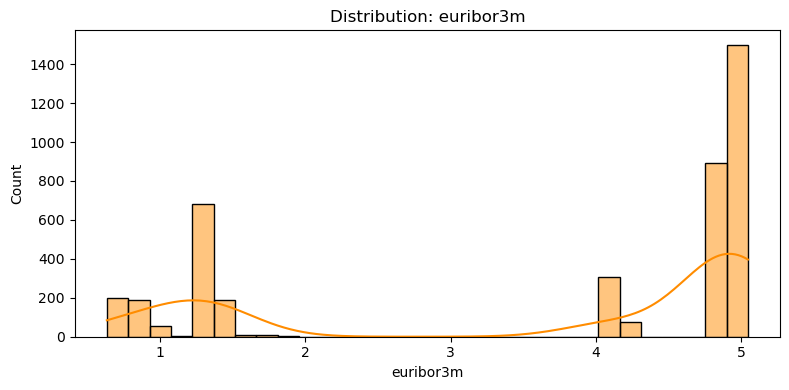

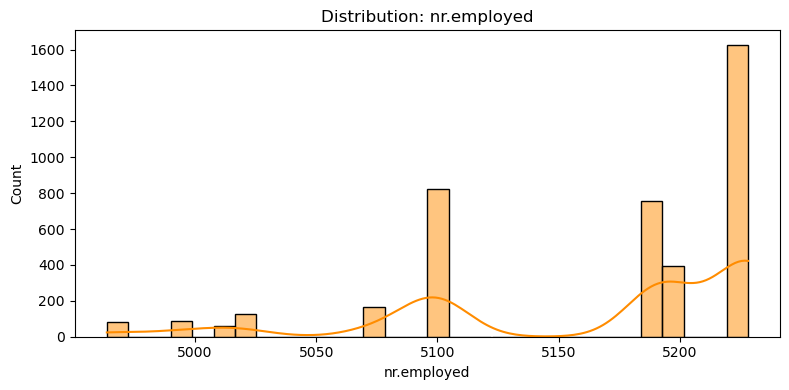

In [97]:
# Step 3: Plot distributions of numerical features
print("Creating Distribution Plots for Numerical Features...")

# Select columns with numeric data types
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns  

# Loop through each numeric column to visualize its distribution
for col in numeric_cols:
    plt.figure(figsize=(8, 4)) # Define the plot size (width=10, height=6)

    # Create a histogram with KDE (Kernel Density Estimate) to show distribution
    sns.histplot(data[col], kde=True, bins=30, color='darkorange') 
    
    plt.title(f"Distribution: {col}")  # Set title
    plt.tight_layout()   # Prevent elements from overlapping
    plt.show()  # Display the plot


In [99]:
# Step 4: Convert categorical features into numerical form using one-hot encoding
print("Applying One-Hot Encoding to Categorical Features...")

# Select all categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns  

# Apply one-hot encoding to all categorical columns except the last one (assumed to be the target variable)
# 'drop_first=True' removes the first category to avoid multicollinearity (dummy variable trap)
encoded_data = pd.get_dummies(data, columns=categorical_cols[:-1], drop_first=True) 


Applying One-Hot Encoding to Categorical Features...


In [101]:
# Step 5: Convert all non numeric variables to numeric variables
print("Converting binary categorical values ('yes'/'no', True/False) to numeric (1/0)...")

# Select columns containing 'yes'/'no' or True/False values in encoded_data
boolean_columns = encoded_data.columns[
    encoded_data.isin(['yes', 'no']).any() | encoded_data.isin([True, False]).any()
]

# Replace 'yes' → 1, 'no' → 0, True → 1, False → 0 
encoded_data[boolean_columns] = encoded_data[boolean_columns].replace({'yes': 1, 'no': 0, True: 1, False: 0})

# Show the updated encoded_data
print("Binary categorical columns converted to 0 and 1:")
display(encoded_data[boolean_columns].head())


Converting binary categorical values ('yes'/'no', True/False) to numeric (1/0)...
Binary categorical columns converted to 0 and 1:


,duration,campaign,pdays,previous,euribor3m,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,487,2,999,0,1.313,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,346,4,999,0,4.855,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,227,1,999,0,4.962,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,17,3,999,0,4.959,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58,1,999,0,4.191,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [103]:
# Step 6: Scale numerical features to a 0–1 range using Min-Max scaling

print("Applying Min-Max Scaling to Numerical Features...")

# Initialize the MinMaxScaler from scikit-learn
scaler = MinMaxScaler()  

# Select numerical columns in the original dataset
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns  

# Apply Min-Max scaling to numerical columns within the encoded dataset
encoded_data[numeric_cols] = scaler.fit_transform(encoded_data[numeric_cols]) 

Applying Min-Max Scaling to Numerical Features...


Visualizing Correlation Heatmap...


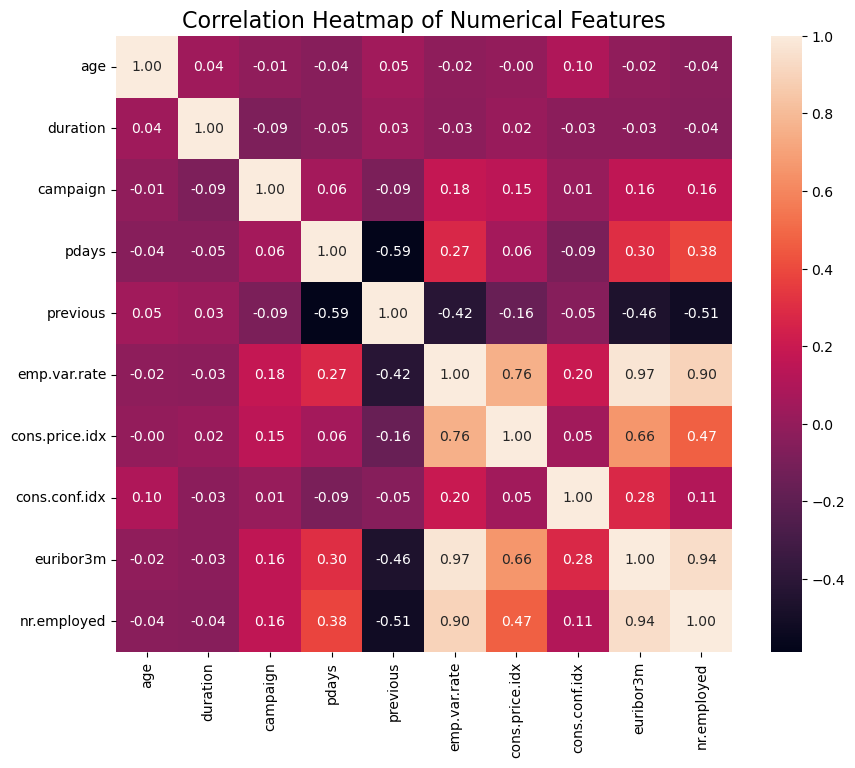

In [109]:
# Step 7: Visualize correlation heatmap
print("Visualizing Correlation Heatmap...")

# Define the size of the heatmap figure
plt.figure(figsize=(10, 8))  

# Calculate the pairwise correlation matrix for numerical columns
corr_matrix = encoded_data[numeric_cols].corr()  

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f", square=True) 
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)  # Set title for heatmap
plt.show()  # Show the plot

In [111]:
# Import modules for dataset resampling operations
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

# Balance the dataset by resampling the target classes
print("Balancing the Dataset...")

# Separate the majority and minority classes based on the target 'y'
data_majority = encoded_data[encoded_data.y == 0]  
data_minority = encoded_data[encoded_data.y == 1]  

# Oversample the minority class to increase its size
data_minority_oversampled = resample(data_minority, replace=True, n_samples=int(len(data_majority) * 0.5), random_state=123)

# Undersample the majority class to reduce its size
data_majority_undersampled = resample(data_majority, replace=False, n_samples=int(len(data_majority) * 0.5), random_state=123)

# Combine both to create a more balanced dataset
data_resampled = pd.concat([data_majority_undersampled, data_minority_oversampled])

# Display the class distribution after resampling
print("Class distribution after resampling:")
print(data_resampled['y'].value_counts())  


Balancing the Dataset...
Class distribution after resampling:
y
0    1834
1    1834
Name: count, dtype: int64


In [113]:
# Show the cleaned and preprocessed dataset
print("Preview of the Cleaned and Preprocessed Dataset:")
display(data_resampled.head())



Preview of the Cleaned and Preprocessed Dataset:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
421,0.114286,0.043920,0.058824,1.0,0.0,0.937500,0.698753,0.602510,0.958957,0.859735,...,1,0,0,0,0,0,0,0,1,0
1945,0.128571,0.050782,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.980952,1.000000,...,0,0,0,0,0,0,1,0,1,0
2810,0.542857,0.047763,0.029412,1.0,0.0,0.937500,0.698753,0.602510,0.957370,0.859735,...,1,0,0,0,0,0,1,0,1,0
2975,0.571429,0.022234,0.000000,1.0,0.0,0.687500,0.622369,0.435146,0.943084,0.877883,...,0,0,1,0,0,1,0,0,1,0
1587,0.514286,0.050508,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.158503,0.512287,...,1,0,0,0,0,0,0,1,1,0


In [115]:
# Review the final dataset for any remaining missing or 'unknown' values
print("Controlling Missing and 'Unknown' Values...")

# Create a summary showing the number of missing and 'unknown' values for each column
missing_data_summary = {
    "Column Name": data_resampled.columns,
    "Number of Missing Values": data_resampled.isnull().sum(),
    "Number of Unknown Values": data_resampled.apply(lambda col: col[col == 'unknown'].count() if col.dtype == 'object' else 0)
}

# Convert the summary into a DataFrame for better display
missing_data_df = pd.DataFrame(missing_data_summary)
display(missing_data_df)




Controlling Missing and 'Unknown' Values...


,Column Name,Number of Missing Values,Number of Unknown Values
age,age,0,0
duration,duration,0,0
campaign,campaign,0,0
pdays,pdays,0,0
previous,previous,0,0
emp.var.rate,emp.var.rate,0,0
cons.price.idx,cons.price.idx,0,0
cons.conf.idx,cons.conf.idx,0,0
euribor3m,euribor3m,0,0
nr.employed,nr.employed,0,0


In [117]:
# Display the cleaned and preprocessed dataset

print("Summary of the Cleaned and Resampled Dataset:") 

# Shows column names, non-null counts, and data type
data_resampled.info()

Summary of the Cleaned and Resampled Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, 421 to 1434
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3668 non-null   float64
 1   duration                       3668 non-null   float64
 2   campaign                       3668 non-null   float64
 3   pdays                          3668 non-null   float64
 4   previous                       3668 non-null   float64
 5   emp.var.rate                   3668 non-null   float64
 6   cons.price.idx                 3668 non-null   float64
 7   cons.conf.idx                  3668 non-null   float64
 8   euribor3m                      3668 non-null   float64
 9   nr.employed                    3668 non-null   float64
 10  y                              3668 non-null   int64  
 11  job_blue-collar                3668 non-null   int64  
 12  job_e

In [119]:
# Save the cleaned dataset (optional)

# Save the DataFrame without the index column
data_resampled.to_csv('cleaned_data.csv', index=False)

print("The preprocessed dataset has been successfully exported as 'cleaned_data.csv'")


The preprocessed dataset has been successfully exported as 'cleaned_data.csv'


# Feature Selection

In [38]:
# Import Essential Libraries for Model Building and Evaluation 

# For saving and loading Python objects
import pickle

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, make_scorer, roc_auc_score, classification_report
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [121]:
# Read the cleaned_data.csv file, convert it to dataframe and visualize

# Load preprocessed dataset
cleaned_data = pd.read_csv('cleaned_data.csv') 

# Extract the list of column names from the DataFrame
column_names = cleaned_data.columns.tolist()

# View the list of all column names in the dataset
column_names


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [123]:
# Separate features (X) and target variable (y) from the dataset
X = cleaned_data.drop('y', axis=1) # Features
y = cleaned_data['y']  # Target Variable

# Returns (number of rows, number of features), and (number of rows,) for y
X.shape, y.shape

# Counts how many 0s and 1s are present in the target
y.value_counts()


y
0    1834
1    1834
Name: count, dtype: int64

In [125]:
# Divide the dataset into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=10) # Split dataset


# Model Training

In [127]:
# Define a function to build a pipeline that includes feature selection and a given model
def createPipeline(model):

    # Step 1: Use the provided model to select the most important features
    feature_selection = SelectFromModel(model)

    # Step 2: Create a pipeline that first selects features, then applies the model
    pipeline = make_pipeline(feature_selection, model)

    return pipeline


In [129]:
# Define a function to train a model using a pipeline and return accuracy and predictions
def trainModel(model, x_train, y_train, x_test, y_test):

    # Step 1: Build a pipeline with feature selection and the specified model
    pipeline = createPipeline(model)

    # Step 2: Train (fit) the pipeline on the training data
    pipeline.fit(x_train, y_train)

    # Step 3: Generate predictions on the test data
    predictions = pipeline.predict(x_test)

    return accuracy_score(y_test, predictions), predictions


In [51]:
# Function to train and select the best model
def findBestModel(models, x_train, y_train, x_test, y_test):
    model_and_recall = {}
    for model in models:
        pipeline = make_pipeline(SelectFromModel(model), model)  # Create pipeline
        pipeline.fit(x_train, y_train)  # Train model
        predictions = pipeline.predict(x_test)  # Predict on test data
        recall = recall_score(y_test, predictions, pos_label=1)  # Calculate recall
        model_and_recall[model] = recall
    best_model = max(model_and_recall, key=model_and_recall.get)  # Select model with highest recall
    return best_model


In [131]:
# Define and train models
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LinearSVC()
    ]

# Find best model
bestmodel = findBestModel(models, x_train, y_train, x_test, y_test) 


# Hyper Parameter Tuning

In [56]:
# Function to perform hyperparameter tuning for a given model
def findHyperParameters(model, x_train, y_train, x_test, y_test, preprocess=None):
    # Define cross-validation strategy with stratified folds
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

    # Create a pipeline with the provided model (preprocessing can be added if needed)
    pipeline = Pipeline(steps=[('model', model)])

    # Perform initial cross-validation to check baseline performance
    results_of_crossValidation = cross_validate(
        pipeline, x_train, y_train, cv=cv, return_train_score=True, return_estimator=True
    )
    # Calculate the average test score from cross-validation
    average_crossValidation_score = np.mean(results_of_crossValidation['test_score'])
    print("CV score: ", average_crossValidation_score)

    # Define parameter grids based on the type of the model
    if isinstance(model, RandomForestClassifier):
        # Parameters for RandomForestClassifier
        param_grid = {
            'model__n_estimators': [200, 300, 400],  # Number of trees in the forest
            'model__max_depth': [4, 6, 8, 10],       # Maximum depth of the trees
            'model__min_samples_split': [5, 10, 15], # Minimum samples required to split a node
        }
    elif isinstance(model, LogisticRegression):
        # Parameters for LogisticRegression
        param_grid = {
            'model__C': [0.1, 1, 10],                # Regularization strength
            'model__solver': ['liblinear', 'lbfgs'], # Optimization algorithm
            'model__max_iter': [100, 200, 300],      # Maximum number of iterations
        }
    elif isinstance(model, DecisionTreeClassifier):
        # Parameters for DecisionTreeClassifier
        param_grid = {
            'model__max_depth': [4, 6, 8, None],     # Maximum depth of the tree
            'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
            'model__criterion': ['gini', 'entropy']  # Function to measure the quality of a split
        }
    elif isinstance(model, LinearSVC):
        # Parameters for LinearSVC
        param_grid = {
            'model__C': [0.1, 1, 10],                # Regularization parameter
            'model__max_iter': [1000, 2000],         # Maximum number of iterations
        }
    else:
        # Raise an error if the model type is not supported
        raise ValueError(f"Unsupported model type: {type(model)}")

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,  # Use the pipeline as the estimator
        param_grid=param_grid,  # Parameter grid to search
        cv=cv,                  # Cross-validation strategy
        scoring='recall'        # Metric to optimize (recall)
    )
    # Fit the grid search on the training data
    grid_search.fit(x_train, y_train)

    # Retrieve the best hyperparameters and the best model from the grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    predictions = best_model.predict(x_test)

    # Calculate recall score on the test set for the positive class (label = 1)
    recall_yes = recall_score(y_test, predictions, pos_label=1)

    # Print the best hyperparameters and the recall score
    print("Best Hyperparameters:", best_params)
    print("Recall score:", recall_yes)

    # Return the best model and the recall score
    return best_model, recall_yes


In [58]:
tuned_best_model, tuned_precision = findHyperParameters(bestmodel, x_train, y_train, x_test, y_test)


CV score:  0.9443807641633729
Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 400}
Recall score: 0.9820627802690582


# Evolution

In [136]:
# Build the pipeline using the best-performing model
pipeline = createPipeline(bestmodel)

# Make predictions on the test set using the trained pipeline
predictions = tuned_best_model.predict(x_test)

report=classification_report(y_test, predictions, target_names=['no', 'yes'])
print("Classification Report for the Best Model:\n")
print(report)

Classification Report for the Best Model:

              precision    recall  f1-score   support

          no       0.98      0.87      0.92       471
         yes       0.88      0.98      0.93       446

    accuracy                           0.92       917
   macro avg       0.93      0.93      0.92       917
weighted avg       0.93      0.92      0.92       917



In [69]:
import pickle
import os

# Masaüstündeki "proje adaaaa" klasörünün tam yolu
save_path = os.path.expanduser("~/Desktop/proje adaaaa/best_model.pkl")

# Dosyayı kaydet
with open(save_path, 'wb') as f:
    pickle.dump(tuned_best_model, f)

print(f"Model saved to: {save_path}")


Model saved to: /Users/helinkahraman/Desktop/proje adaaaa/best_model.pkl
